# Investment Analysis Assignment

## Objectives
- The objective is to identify the best sectors, countries, and a suitable investment type for making investments. 
- The overall strategy is to invest where others are investing, implying that the 'best' sectors and countries are the ones 'where most investors are investing'

Goals of data analysis:
- Investment type analysis: Comparing the typical investment amounts in the venture, seed, angel and private equity  to choose  best suited funding type for Spark Funds
- Country analysis: Identifying the countries which have been the most heavily invested in the past. These will be Spark Funds’ favourites as well.
- Sector analysis: Understanding the distribution of investments across the eight main sectors.


In [1182]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1183]:
# Changing to show more rows for visual analysis
pd.set_option('display.max_rows', 500)
# Changing display format to not show scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [1184]:
#Importing required datasets
# Two dataframes are created 
# 1.) companies - containing companies information 
# 2.) rounds2 - containing funding rounds information
companies = pd.read_csv('companies.csv', encoding = "palmos")
rounds2 = pd.read_csv('rounds2.csv', encoding = "palmos")

Visually analyzing the data

In [1185]:
# companies dataframe
companies.head(100)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
5,/Organization/01Games-Technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN
6,/Organization/0Ndine-Biomedical-Inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
7,/Organization/0Xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
8,/Organization/1,One Inc.,http://whatis1.com,Mobile,operating,USA,CA,SF Bay Area,San Francisco,01-08-2011
9,/Organization/1-2-3-Listo,"1,2,3 Listo",http://www.123listo.com,E-Commerce,operating,CHL,12,Santiago,Las Condes,01-01-2012


In [1186]:
# rounds2 dataframe
rounds2.head(100)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.00
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00
5,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,nan
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.00
7,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.00
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.00
9,/ORGANIZATION/0XDATA,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.00


Anaysis drawn from intial look:
* **rounds2.company_permalink** and **companies.permalink** is the common column in the dataframe and can be used to merge the dataframes
* Taking another look at the data for both the column as it will be used to merge the dataset
  * **rounds2.company_permalink** - some rows are in upper case while some are in lower case
  * **companies.permalink** has first letter capitalized
  * Casing should be handled for proper merging of the dataframes

In [1187]:
# changing rounds2['company_permalink'] to lowercase
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()

In [1188]:
# changing companies['permalink']  to lowercase
companies['permalink'] = companies['permalink'].str.lower()

Taking another look at the dataframe and verifying casing has been handled

In [1189]:
# companies dataframe
companies.head(100)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
5,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN
6,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
7,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
8,/organization/1,One Inc.,http://whatis1.com,Mobile,operating,USA,CA,SF Bay Area,San Francisco,01-08-2011
9,/organization/1-2-3-listo,"1,2,3 Listo",http://www.123listo.com,E-Commerce,operating,CHL,12,Santiago,Las Condes,01-01-2012


In [1190]:
# rounds2 dataframe
rounds2.head(100)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.00
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,nan
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.00
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.00
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.00
9,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.00


### Checkpoint 1
- How many unique companies are present in rounds2?
- How many unique companies are present in companies?
- In the companies data frame, which column can be used as the unique key for each company? Write the name of the colum
- Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N
- Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame?

In [1191]:
# How many unique companies are present in rounds2?
len(rounds2.company_permalink.unique())

66368

In [1192]:
# How many unique companies are present in companies?
len(companies.permalink.unique())

66368

In [1193]:
# Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N
rounds2[~rounds2.company_permalink.isin(companies.permalink)]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd


In [1194]:
# Merging 'companies' and 'rounds2' dataframe to create one 'master_frame' dataframe and analyzing the data
master_frame = pd.merge(rounds2, companies, how='inner', left_on='company_permalink' , right_on = 'permalink')
master_frame.head(100)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.00,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,nan,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.00,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.00,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.00,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
9,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.00,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011


In [1195]:
# Shape of the dataframe
master_frame.shape

(114949, 16)

#### Checkpoint 1 answers
- How many unique companies are present in rounds2?
  - 66368
- How many unique companies are present in companies?
  - 66368
- In the companies data frame, which column can be used as the unique key for each company? Write the name of the column
  - companies.permalink
- Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N
  - N
- Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame?
  - 114949

Visually analyzing the data and looking at the analysis objectives, it can be concluded that the below columns are not needed and can be removed without causing any effect on the analysis

Removing unnecessary columns:
* company_permalink and permalink column contain same data, Hence, removing permalink column
* funding_round_code
* funded_at
* homepage_url
* status
* state_code
* region	
* city	
* founded_at

In [1196]:
# dropping unnecessary columns
master_frame.drop(['permalink','funding_round_code','funded_at','homepage_url','status','state_code','region','city','founded_at'], axis = 1, inplace=True) 

In [1197]:
# Verifying that the columns are dropped
master_frame.head(100)

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.00,#fame,Media,IND
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,nan,:Qounter,Application Platforms|Real Time|Social Network...,USA
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,700000.00,:Qounter,Application Platforms|Real Time|Social Network...,USA
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,3406878.00,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,2000000.00,0-6.com,Curated Web,CHN
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,nan,004 Technologies,Software,USA
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,41250.00,01Games Technology,Games,HKG
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,43360.00,Ondine Biomedical Inc.,Biotechnology,CAN
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,719491.00,Ondine Biomedical Inc.,Biotechnology,CAN
9,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,3000000.00,H2O.ai,Analytics,USA


In [1198]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   raised_amount_usd        94959 non-null   float64
 4   name                     114948 non-null  object 
 5   category_list            111539 non-null  object 
 6   country_code             106271 non-null  object 
dtypes: float64(1), object(6)
memory usage: 7.0+ MB


In [1199]:
# Shape of the dataframe
master_frame.shape

(114949, 7)

In [1200]:
# checking for rows with complete value missing
master_frame.isnull().all(axis=1).sum()

0

In [1201]:
# summing up the missing values (column-wise)
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
raised_amount_usd          19990
name                           1
category_list               3410
country_code                8678
dtype: int64

In [1202]:
# checking percentage of missing values
round(100 * master_frame.isnull().sum() /len(master_frame.index),2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
raised_amount_usd         17.39
name                       0.00
category_list              2.97
country_code               7.55
dtype: float64

As our analysis is to understand which companies to invest by analyzing `raised_amount_usd`, `country_code` and `category_list` columns, it is not safe to impute values in these columns

Hence, dropping all rows with NULL values in  `raised_amount_usd`, `country_code` and `category_list`

In [1203]:
# dropping rows with null 'raised_amount_usd'
master_frame = master_frame[~(master_frame['raised_amount_usd'].isnull() | master_frame['country_code'].isnull() | master_frame['category_list'].isnull())]

In [1204]:
master_frame.shape

(88529, 7)

In [1205]:
# summing up the missing values (column-wise)
master_frame.isnull().sum()

company_permalink          0
funding_round_permalink    0
funding_round_type         0
raised_amount_usd          0
name                       1
category_list              0
country_code               0
dtype: int64

In [1206]:
# checking the row with missing value in name column
master_frame[master_frame['name'].isnull()]

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
98692,/organization/tell-it-in,/funding-round/9c987e616755a78c51a4aa67c27a2a93,seed,25000.00,NaN,Startups,USA


Visually analyzing the data, we can see that the company name is present after the last '/' in company_permalink column. It can be safe way to impute missing company names.

Hence, imputing the missing company names using the company_permalink column

In [1207]:
# Imputing missing value in name column
master_frame['name'] = master_frame['name'].fillna(master_frame[master_frame['name'].isnull()]['company_permalink'].str.rsplit('/', 1).str[1])

In [1208]:
# summing up the missing values (column-wise)
master_frame.isnull().sum()

company_permalink          0
funding_round_permalink    0
funding_round_type         0
raised_amount_usd          0
name                       0
category_list              0
country_code               0
dtype: int64

In [1209]:
# Percentage of rows left
# initial count of rows was 114949
round(len(master_frame.index) * 100 / 114949,2)

77.02

### Checkpoint 2
- Calculate the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity)
- Based on the most representative investment amount calculated above, which investment type do you think is the most suitable for Spark Funds? Considering that Spark Funds wants to invest between 5 to 15 million USD per investment round


As Sparks fund is only interested in investing in below fours funding types:
- venture
- angel
- seed
- private equity

Filtering the dataframe for these funding types

In [1210]:
master_frame.funding_round_type.value_counts()

venture                  47809
seed                     21095
debt_financing            6506
angel                     4400
grant                     1939
private_equity            1820
undisclosed               1345
convertible_note          1320
equity_crowdfunding       1128
post_ipo_equity            598
product_crowdfunding       330
post_ipo_debt              151
non_equity_assistance       60
secondary_market            28
Name: funding_round_type, dtype: int64

In [1211]:
# filtering for 'venture', 'seed', 'angel' and 'private_equity' funding type
master_frame = master_frame[master_frame['funding_round_type'].isin(['venture', 'seed', 'angel', 'private_equity'])]

In [1212]:
# checking the head of dataframe
master_frame.head(10)

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.00,#fame,Media,IND
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,700000.00,:Qounter,Application Platforms|Real Time|Social Network...,USA
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,2000000.00,0-6.com,Curated Web,CHN
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,43360.00,Ondine Biomedical Inc.,Biotechnology,CAN
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,719491.00,Ondine Biomedical Inc.,Biotechnology,CAN
9,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,3000000.00,H2O.ai,Analytics,USA
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,20000000.00,H2O.ai,Analytics,USA
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,1700000.00,H2O.ai,Analytics,USA
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,8900000.00,H2O.ai,Analytics,USA
13,/organization/1,/funding-round/03b975068632eba5bfdb937ec8c07a68,seed,150000.00,One Inc.,Mobile,USA


In [1213]:
master_frame.shape

(75124, 7)

In [1214]:
master_frame['raised_amount_usd'].describe()

count         75124.00
mean        9519475.01
std        77927781.97
min               0.00
25%          470585.25
50%         2000000.00
75%         8000000.00
max     17600000000.00
Name: raised_amount_usd, dtype: float64

Looking at the values for **raised_amount_usd_millions**
- max is very high as compared to 3rd quantile
- there is a huge difference between mean and median

Hence, checking the data for outliers

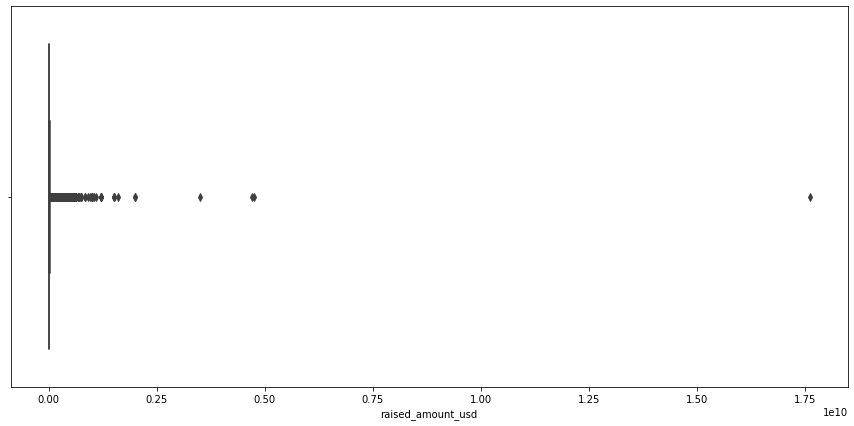

In [1215]:
#Creating a box plot for the raised_amount_usd column
plt.figure(figsize=(15,7))
sns.boxplot(master_frame['raised_amount_usd'])
plt.show()

There seems to be few values very high as compared to normal distribution of data. Analysing it better by dividing the data into funding round typed

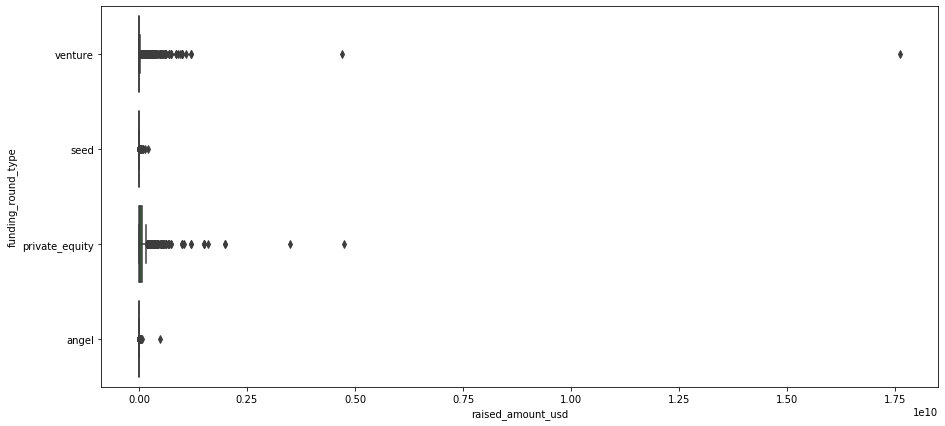

In [1216]:
#Creating a box plot for the raised_amount_usd column w.r.t. to funding_round_type
plt.figure(figsize=(15,7))
sns.boxplot(master_frame['raised_amount_usd'], master_frame['funding_round_type'])
plt.show()

Looking at the distribution
- it can be observed that there are four values more than 2500000000 USD
- One of them is 17500000000 USD is present in Venture round, which seems to be incorrect
- these values are very high and seem to discrepancy
- Removing these records as they are outlier and are distorting the statstics of data

In [1217]:
# Checking the four records with very high investment amount
master_frame[master_frame['raised_amount_usd']>2500000000]

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
35771,/organization/first-data-corporation,/funding-round/33f172fa2e81afbc0c4518aa547da55f,private_equity,3500000000.00,First Data Corporation,Payments|Trading,USA
37569,/organization/freescale,/funding-round/a1495c088d886c8a4f4ce74403b77385,venture,17600000000.00,Freescale Semiconductor,Semiconductors,USA
60207,/organization/mediavast,/funding-round/07e345b61646adffc65946de6a1c88d9,venture,4700000000.00,MediaVast,Advertising|Broadcasting|Content,USA
75532,/organization/ping-an,/funding-round/d4b60b811b58b882e2ca18decc30e657,private_equity,4745460219.00,Ping An,Banking|Financial Services|Insurance|Investmen...,CHN


In [1218]:
# removing the four outliers records
master_frame = master_frame[master_frame['raised_amount_usd']<=2500000000]

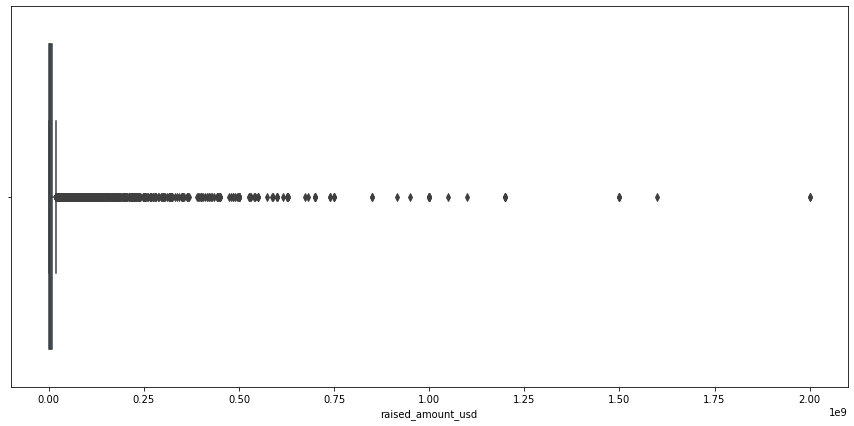

In [1219]:
# Re-creating a box plot for the raised_amount_usd column after removing outliers
plt.figure(figsize=(15,7))
sns.boxplot(master_frame['raised_amount_usd'])
plt.show()

The distribution now looks to be correct and there doesn't seem to be huge outliers

Analyzing the data now w.r.t. funding rounds types

In [1220]:
# analyzing the 'raised_amount_usd' by 'funding_round_type'
master_frame.groupby('funding_round_type')['raised_amount_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
funding_round_type,,,,,,,,
angel,4400.00,971573.89,7710904.33,0.00,152756.50,414906.00,1000000.00,494511992.00
private_equity,1818.00,69484370.08,149225145.54,0.00,5000000.00,20000000.00,75030001.25,2000000000.00
seed,21095.00,747793.68,2288317.64,0.00,68816.50,300000.00,1000000.00,200000000.00
venture,47807.00,11258254.28,29179710.22,0.00,1600000.00,5000000.00,12000000.00,1200000000.00


Looking at the spread of invesment across funding round types
- min value for all funding round types is 0
- max value is very high
- standard deviation is very high
- there is a huge difference in mean and median for all funding round types
- data is unevenly ditributed
- mean cannot be representative value for investment amount
- median is a better representative of investment amount 

Choosing **median** as the most representative value of the investment amount.

Looking at **median** for all four funding round types, **Venture** falls in the investment bracket for Sparks Fund

## Chosen funding_round_type = Venture
Filtering the dataframe on funding_round_type = Venture

In [1221]:
# Creating a copy of master_frame with all four fundint type for creating graph
funding_type_plot = master_frame

In [1222]:
# filtering master_frame for funding round type venture
master_frame = master_frame[master_frame['funding_round_type']=='venture']

In [1223]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.00,#fame,Media,IND
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,2000000.00,0-6.com,Curated Web,CHN
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,719491.00,Ondine Biomedical Inc.,Biotechnology,CAN
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,20000000.00,H2O.ai,Analytics,USA
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,1700000.00,H2O.ai,Analytics,USA


In [1224]:
master_frame.shape

(47807, 7)

### Checkpoint 3: Country Analysis
- Spark Funds wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)
- For the chosen investment type, make a data frame named top9 with the top nine countries (based on the total investment amount each country has received)
- Identify the top three English-speaking countries in the data frame top9.

In [1225]:
# Creating dataframe top9 containing top9 countries by amount invested
top9 = master_frame.pivot_table(values = 'raised_amount_usd', index = 'country_code', aggfunc = 'sum').sort_values(by = 'raised_amount_usd', ascending = False)[:9]
top9

,raised_amount_usd
country_code,
USA,397768029342.00
CHN,39338918773.00
GBR,20072813004.00
IND,14261508718.00
CAN,9482217668.00
FRA,7226851352.00
ISR,6854350477.00
DEU,6306921981.00
JPN,3167647127.00


Looking at list of English speaking countries and comparing it with the result of top9 countries by investment amount

Top 3 english speaking countries are:
1. USA
2. GBR
3. IND

[Click here to see list of english speaking countries](https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language)

### Checkpoint 4: Sector Analysis 1
- Extract the primary sector of each category list from the category_list column
- Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors (Note that ‘Others’ is also considered one of the main sectors

Business Rule(as agreed by CEO)
- Some category_list is a list of multiple sub-sectors separated by a pipe (vertical bar |).
- In those cases, first string before the vertical bar will be considered the primary sector.

In [1226]:
# Splitting the `category_list` column by pipe to create `primary_sector` column, as a business rule the first value in the list will be considered primary sector
master_frame['primary_sector'] = master_frame['category_list'].str.split('|').str[0]

C:\Users\faizr\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [1227]:
master_frame.head(100)

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,primary_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.00,#fame,Media,IND,Media
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,2000000.00,0-6.com,Curated Web,CHN,Curated Web
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,719491.00,Ondine Biomedical Inc.,Biotechnology,CAN,Biotechnology
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,20000000.00,H2O.ai,Analytics,USA,Analytics
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,1700000.00,H2O.ai,Analytics,USA,Analytics
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,8900000.00,H2O.ai,Analytics,USA,Analytics
22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,5000000.00,1 Mainstream,Apps|Cable|Distribution|Software,USA,Apps
28,/organization/10-minutes-with,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,4000000.00,10 Minutes With,Education,GBR,Education
34,/organization/1000memories,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,2520000.00,1000memories,Curated Web,USA,Curated Web
38,/organization/1000museums-com,/funding-round/13be128d655076a025221d7fddc90d68,venture,265940.00,1000museums.com,Curated Web,USA,Curated Web


In [1228]:
# Reading the mapping file
mapping = pd.read_csv('mapping.csv')

In [1229]:
# shape o data frame
mapping.shape

(688, 10)

In [1230]:
# Visually analyzing the data
mapping.head(100)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0
6,Ad Targeting,0,0,0,0,0,0,0,0,1
7,Advanced Materials,0,0,0,0,0,1,0,0,0
8,Adventure Travel,1,0,0,0,0,0,0,0,0
9,Advertising,0,0,0,0,0,0,0,0,1


Observation from visual analysis of data
- row containing NaN value for category_list is present
- There are only eight main sector, but a column with name `Blanks` is present 
- index -20,22, etc, it can be observed that there is spelling error in `category_list` where `na` is written as `0`


In [1231]:
# summing up the missing values (column-wise)
mapping.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [1232]:
# Dropping missing values from 'category_list' column
mapping = mapping[~mapping['category_list'].isnull()]

In [1233]:
# Verifying that the missing value has been dropped
mapping.isnull().sum()

category_list                              0
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [1234]:
# Dropping the columns `Blanks`
mapping.drop(['Blanks'], axis = 1, inplace=True)

In [1235]:
# replacing `0` with `na`
mapping['category_list'] = mapping['category_list'].str.replace('0', 'na')

In [1236]:
# checking whether spelling error in `category_list` column has been corrected
mapping.head(100)

,category_list,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,1,0,0,0,0
6,Ad Targeting,0,0,0,0,0,0,0,1
7,Advanced Materials,0,0,0,0,1,0,0,0
8,Adventure Travel,1,0,0,0,0,0,0,0
9,Advertising,0,0,0,0,0,0,0,1
10,Advertising Exchanges,0,0,0,0,0,0,0,1


In [1237]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687 entries, 1 to 687
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      687 non-null    int64 
 2   Cleantech / Semiconductors               687 non-null    int64 
 3   Entertainment                            687 non-null    int64 
 4   Health                                   687 non-null    int64 
 5   Manufacturing                            687 non-null    int64 
 6   News, Search and Messaging               687 non-null    int64 
 7   Others                                   687 non-null    int64 
 8   Social, Finance, Analytics, Advertising  687 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 53.7+ KB


In [1238]:
# visually analysing the dataframe
mapping.head(100)

,category_list,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,1,0,0,0,0
6,Ad Targeting,0,0,0,0,0,0,0,1
7,Advanced Materials,0,0,0,0,1,0,0,0
8,Adventure Travel,1,0,0,0,0,0,0,0
9,Advertising,0,0,0,0,0,0,0,1
10,Advertising Exchanges,0,0,0,0,0,0,0,1


Looking at the data, we observe
- first column contains the primary_sector and rest of the columns header indicate main_sector. 
- Intersection of the rows from first column and rest of the columns mark which primary_sector belongs to which main_sector by using value 1 and 0

Dataframe in the current shape can't be used for mapping primary_sector to main_sector for master_frame and needs to be reshaped

In [1239]:
# Reshaping the mapping dataframe
mapping = pd.melt(mapping, id_vars=['category_list'], var_name ='main_sector', value_name ='isMainSector')

In [1240]:
# visually analysing the dataframe to check reshaping
mapping.head(100)

,category_list,main_sector,isMainSector
0,3D,Automotive & Sports,0
1,3D Printing,Automotive & Sports,0
2,3D Technology,Automotive & Sports,0
3,Accounting,Automotive & Sports,0
4,Active Lifestyle,Automotive & Sports,0
5,Ad Targeting,Automotive & Sports,0
6,Advanced Materials,Automotive & Sports,0
7,Adventure Travel,Automotive & Sports,1
8,Advertising,Automotive & Sports,0
9,Advertising Exchanges,Automotive & Sports,0


In [1241]:
# filtering the dataframe to only contain rows where `isMainSector` fiter is 1
mapping = mapping[mapping['isMainSector'] == 1]

In [1242]:
mapping.head(100)

,category_list,main_sector,isMainSector
7,Adventure Travel,Automotive & Sports,1
13,Aerospace,Automotive & Sports,1
44,Auto,Automotive & Sports,1
45,Automated Kiosk,Automotive & Sports,1
46,Automotive,Automotive & Sports,1
56,Bicycles,Automotive & Sports,1
68,Boating Industry,Automotive & Sports,1
86,CAD,Automotive & Sports,1
92,Cars,Automotive & Sports,1
187,Design,Automotive & Sports,1


In [1243]:
# dropping isMainSector column as it is not needed anymore
mapping.drop(['isMainSector'], axis = 1, inplace=True)

In [1244]:
# visually analysing the dataframe to confirm that the column has been dropped
mapping.head(10)

,category_list,main_sector
7,Adventure Travel,Automotive & Sports
13,Aerospace,Automotive & Sports
44,Auto,Automotive & Sports
45,Automated Kiosk,Automotive & Sports
46,Automotive,Automotive & Sports
56,Bicycles,Automotive & Sports
68,Boating Industry,Automotive & Sports
86,CAD,Automotive & Sports
92,Cars,Automotive & Sports
187,Design,Automotive & Sports


In [1245]:
mapping.shape

(687, 2)

In [1246]:
#Coverting the mapping dataframe to dictionary to map primary_sector in master_frame to main_sector in mapping dataframe
sector_map_dict = dict(mapping[['category_list', 'main_sector']].values)
master_frame['main_sector'] = master_frame.primary_sector.map(sector_map_dict)

C:\Users\faizr\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [1247]:
master_frame.head(10)

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.00,#fame,Media,IND,Media,Entertainment
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,2000000.00,0-6.com,Curated Web,CHN,Curated Web,"News, Search and Messaging"
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,719491.00,Ondine Biomedical Inc.,Biotechnology,CAN,Biotechnology,Cleantech / Semiconductors
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,20000000.00,H2O.ai,Analytics,USA,Analytics,"Social, Finance, Analytics, Advertising"
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,1700000.00,H2O.ai,Analytics,USA,Analytics,"Social, Finance, Analytics, Advertising"
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,8900000.00,H2O.ai,Analytics,USA,Analytics,"Social, Finance, Analytics, Advertising"
22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,5000000.00,1 Mainstream,Apps|Cable|Distribution|Software,USA,Apps,"News, Search and Messaging"
28,/organization/10-minutes-with,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,4000000.00,10 Minutes With,Education,GBR,Education,Others
34,/organization/1000memories,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,2520000.00,1000memories,Curated Web,USA,Curated Web,"News, Search and Messaging"
38,/organization/1000museums-com,/funding-round/13be128d655076a025221d7fddc90d68,venture,265940.00,1000museums.com,Curated Web,USA,Curated Web,"News, Search and Messaging"


In [1248]:
master_frame.shape

(47807, 9)

### Checkpoint 5: Sector Analysis 2
Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type FT falling within the 5-15 million USD range. The three data frames should contain:
- All the columns of the master_frame along with the primary sector and the main sector
- The total number (or count) of investments for each main sector in a separate column
- The total amount invested in each main sector in a separate column

In [1249]:
# Creating a dataframe D1 for USA
D1 = master_frame[(master_frame['country_code'] == 'USA') & (master_frame['raised_amount_usd'] >= 5000000) & (master_frame['raised_amount_usd'] <= 15000000)]
D1.head(100)

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,primary_sector,main_sector
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,8900000.00,H2O.ai,Analytics,USA,Analytics,"Social, Finance, Analytics, Advertising"
22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,5000000.00,1 Mainstream,Apps|Cable|Distribution|Software,USA,Apps,"News, Search and Messaging"
103,/organization/128-technology,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,11999347.00,128 Technology,Service Providers|Technology,USA,Service Providers,Others
110,/organization/1366-technologies,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,15000000.00,1366 Technologies,Manufacturing,USA,Manufacturing,Manufacturing
111,/organization/1366-technologies,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,5000000.00,1366 Technologies,Manufacturing,USA,Manufacturing,Manufacturing
112,/organization/1366-technologies,/funding-round/786f61aa9866f4471151285f5c56be36,venture,5150000.00,1366 Technologies,Manufacturing,USA,Manufacturing,Manufacturing
113,/organization/1366-technologies,/funding-round/82ace97530965cd2be8f262836b43ff5,venture,12400000.00,1366 Technologies,Manufacturing,USA,Manufacturing,Manufacturing
114,/organization/1366-technologies,/funding-round/ab99fc5a53717b1b53fd6aa5687c5fa9,venture,6000000.00,1366 Technologies,Manufacturing,USA,Manufacturing,Manufacturing
134,/organization/170-systems,/funding-round/b84bb882ca873f5fb96535671981196d,venture,14000000.00,170 Systems,Software,USA,Software,Others
140,/organization/17zuoye,/funding-round/69690484f51e15bc27ff52bfe472cd96,venture,5000000.00,17zuoye,Education|Language Learning,USA,Education,Others


In [1250]:
# Aggregating D1 dataframe for total investment amount and count for main sector
D1_sector_analysis = D1.groupby('main_sector')['raised_amount_usd'].agg(['sum', 'count']).rename(columns={'sum':'main_sector_total_amount_usd','count' : 'main_sector_total_count'})
D1_sector_analysis

,main_sector_total_amount_usd,main_sector_total_count
main_sector,,
Automotive & Sports,1454104361.00,167
Cleantech / Semiconductors,21206628192.00,2300
Entertainment,5099197982.00,591
Health,8211859357.00,909
Manufacturing,7258553378.00,799
"News, Search and Messaging",13959567428.00,1582
Others,26321007002.00,2950
"Social, Finance, Analytics, Advertising",23807376964.00,2714


In [1251]:
# Merging total investment amount and count for main sector into dataframe D1
D1 = D1.merge(D1_sector_analysis, how='left', on ='main_sector')
D1.head()

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,primary_sector,main_sector,main_sector_total_amount_usd,main_sector_total_count
0,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,8900000.00,H2O.ai,Analytics,USA,Analytics,"Social, Finance, Analytics, Advertising",23807376964.00,2714.00
1,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,5000000.00,1 Mainstream,Apps|Cable|Distribution|Software,USA,Apps,"News, Search and Messaging",13959567428.00,1582.00
2,/organization/128-technology,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,11999347.00,128 Technology,Service Providers|Technology,USA,Service Providers,Others,26321007002.00,2950.00
3,/organization/1366-technologies,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,15000000.00,1366 Technologies,Manufacturing,USA,Manufacturing,Manufacturing,7258553378.00,799.00
4,/organization/1366-technologies,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,5000000.00,1366 Technologies,Manufacturing,USA,Manufacturing,Manufacturing,7258553378.00,799.00


In [1252]:
# Creating a dataframe D2 for GBR
D2 = master_frame[(master_frame['country_code'] == 'GBR') & (master_frame['raised_amount_usd'] >= 5000000) & (master_frame['raised_amount_usd'] <= 15000000)]
D2.head(100)

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,primary_sector,main_sector
401,/organization/365scores,/funding-round/48212f931f542fdef78810bc87aef086,venture,5500000.00,365Scores,Android|Apps|iPhone|Mobile|Sports,GBR,Android,"Social, Finance, Analytics, Advertising"
864,/organization/7digital,/funding-round/b5ad7ed7baddd3974bd51403f17dd88f,venture,8468328.00,7digital,Content Creators|Content Delivery|Licensing|Mu...,GBR,Content Creators,Entertainment
865,/organization/7digital,/funding-round/eafacfcceb1fbc4fd605f641b603313e,venture,10000000.00,7digital,Content Creators|Content Delivery|Licensing|Mu...,GBR,Content Creators,Entertainment
942,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,15000000.00,90min,Media|News|Publishing|Soccer|Sports,GBR,Media,Entertainment
943,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,5800000.00,90min,Media|News|Publishing|Soccer|Sports,GBR,Media,Entertainment
1172,/organization/abcodia,/funding-round/3d20c23d203134ed86c0d1b2bec288b2,venture,8259067.00,Abcodia,Biotechnology,GBR,Biotechnology,Cleantech / Semiconductors
1354,/organization/acacia-pharma,/funding-round/26eac8a3875e1a7bc68d36ceb7a71b05,venture,10000000.00,Acacia Pharma,Biotechnology,GBR,Biotechnology,Cleantech / Semiconductors
1383,/organization/acal-energy,/funding-round/16817efd4bbef10f63cccdf158f47a41,venture,9910333.00,ACAL Energy,Clean Technology,GBR,Clean Technology,Cleantech / Semiconductors
1386,/organization/acal-enterprise-solutions,/funding-round/0f9a693d9686330c5c2724215e0048e2,venture,10720178.00,Acal Enterprise Solutions,Information Technology,GBR,Information Technology,"Social, Finance, Analytics, Advertising"
1471,/organization/accent-media-ltd,/funding-round/9dc643fa45031a46ffcfaa061d94e3e3,venture,8300000.00,Accent Media Limited,Domains|Internet|Ticketing,GBR,Domains,"News, Search and Messaging"


In [1253]:
# Aggregating D2 dataframe for total investment amount and count for main sector
D2_sector_analysis = D2.groupby('main_sector')['raised_amount_usd'].agg(['sum', 'count']).rename(columns={'sum':'main_sector_total_amount_usd','count' : 'main_sector_total_count'})
D2_sector_analysis

,main_sector_total_amount_usd,main_sector_total_count
main_sector,,
Automotive & Sports,167051565.00,16
Cleantech / Semiconductors,1150139665.00,128
Entertainment,482784687.00,56
Health,214537510.00,24
Manufacturing,361940335.00,42
"News, Search and Messaging",615746235.00,73
Others,1283624289.00,147
"Social, Finance, Analytics, Advertising",1089404014.00,133


In [1254]:
# Merging total investment amount and count for main sector into dataframe D2
D2 = D2.merge(D2_sector_analysis, how='left', on ='main_sector')
D2.head(100)

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,primary_sector,main_sector,main_sector_total_amount_usd,main_sector_total_count
0,/organization/365scores,/funding-round/48212f931f542fdef78810bc87aef086,venture,5500000.00,365Scores,Android|Apps|iPhone|Mobile|Sports,GBR,Android,"Social, Finance, Analytics, Advertising",1089404014.00,133.00
1,/organization/7digital,/funding-round/b5ad7ed7baddd3974bd51403f17dd88f,venture,8468328.00,7digital,Content Creators|Content Delivery|Licensing|Mu...,GBR,Content Creators,Entertainment,482784687.00,56.00
2,/organization/7digital,/funding-round/eafacfcceb1fbc4fd605f641b603313e,venture,10000000.00,7digital,Content Creators|Content Delivery|Licensing|Mu...,GBR,Content Creators,Entertainment,482784687.00,56.00
3,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,15000000.00,90min,Media|News|Publishing|Soccer|Sports,GBR,Media,Entertainment,482784687.00,56.00
4,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,5800000.00,90min,Media|News|Publishing|Soccer|Sports,GBR,Media,Entertainment,482784687.00,56.00
5,/organization/abcodia,/funding-round/3d20c23d203134ed86c0d1b2bec288b2,venture,8259067.00,Abcodia,Biotechnology,GBR,Biotechnology,Cleantech / Semiconductors,1150139665.00,128.00
6,/organization/acacia-pharma,/funding-round/26eac8a3875e1a7bc68d36ceb7a71b05,venture,10000000.00,Acacia Pharma,Biotechnology,GBR,Biotechnology,Cleantech / Semiconductors,1150139665.00,128.00
7,/organization/acal-energy,/funding-round/16817efd4bbef10f63cccdf158f47a41,venture,9910333.00,ACAL Energy,Clean Technology,GBR,Clean Technology,Cleantech / Semiconductors,1150139665.00,128.00
8,/organization/acal-enterprise-solutions,/funding-round/0f9a693d9686330c5c2724215e0048e2,venture,10720178.00,Acal Enterprise Solutions,Information Technology,GBR,Information Technology,"Social, Finance, Analytics, Advertising",1089404014.00,133.00
9,/organization/accent-media-ltd,/funding-round/9dc643fa45031a46ffcfaa061d94e3e3,venture,8300000.00,Accent Media Limited,Domains|Internet|Ticketing,GBR,Domains,"News, Search and Messaging",615746235.00,73.00


In [1255]:
# Creating a dataframe D3 for IND
D3 = master_frame[(master_frame['country_code'] == 'IND') & (master_frame['raised_amount_usd'] >= 5000000) & (master_frame['raised_amount_usd'] <= 15000000)]
D3.head(100)

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.00,#fame,Media,IND,Media,Entertainment
227,/organization/21diamonds-india,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,6369507.00,21Diamonds,E-Commerce,IND,E-Commerce,Others
1049,/organization/a-little-world,/funding-round/18d98f82ed392b1609975b81f3e8b3fb,venture,6410000.00,A LITTLE WORLD,Finance,IND,Finance,"Social, Finance, Analytics, Advertising"
2507,/organization/adlabs-imagica,/funding-round/508d3c83daaae9fda3ba6f9682c78f6c,venture,8180000.00,Adlabs Imagica,Entertainment|Tourism,IND,Entertainment,Entertainment
3457,/organization/agile,/funding-round/cd3dd1c98ce9d0f632d8752163941674,venture,5740000.00,Agile,Finance|Finance Technology|FinTech|Insurance,IND,Finance,"Social, Finance, Analytics, Advertising"
4076,/organization/akosha,/funding-round/908a8813e2273a2bc604bf40a45c15ff,venture,5000000.00,Akosha,Consumer Internet|Digital Media|Enterprise Sof...,IND,Consumer Internet,"Social, Finance, Analytics, Advertising"
5050,/organization/amagi-media-labs,/funding-round/f244a91cc714317f6fbbc80dcc1d5135,venture,5500000.00,Amagi Media Labs,Advertising,IND,Advertising,"Social, Finance, Analytics, Advertising"
5305,/organization/ameyo,/funding-round/81b50a403d5d2293715fe9b0ce4db5d3,venture,5000000.00,Ameyo,Software,IND,Software,Others
5836,/organization/ani-technologies,/funding-round/1e2b54335e2a41d8d7db25b7c11db399,venture,5000000.00,Ola,Automotive|E-Commerce|Internet|Mobile|Mobile C...,IND,Automotive,Automotive & Sports
5902,/organization/annapurna-microfinace,/funding-round/3f03bc9fea4ae59b1ce8c86a0782107e,venture,5000000.00,Annapurna Microfinace,Finance,IND,Finance,"Social, Finance, Analytics, Advertising"


In [1256]:
# Aggregating D3 dataframe for total investment amount and count for main sector
D3_sector_analysis = D3.groupby('main_sector')['raised_amount_usd'].agg(['sum', 'count']).rename(columns={'sum':'main_sector_total_amount_usd','count' : 'main_sector_total_count'})
D3_sector_analysis

,main_sector_total_amount_usd,main_sector_total_count
main_sector,,
Automotive & Sports,136900000.00,13
Cleantech / Semiconductors,165380000.00,20
Entertainment,280830000.00,33
Health,167740000.00,19
Manufacturing,200900000.00,21
"News, Search and Messaging",433834545.00,52
Others,1013409507.00,110
"Social, Finance, Analytics, Advertising",550549550.00,60


In [1257]:
# Merging total investment amount and count for main sector into dataframe D3
D3 = D3.merge(D3_sector_analysis, how='left', on ='main_sector')
D3.head(100)

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,primary_sector,main_sector,main_sector_total_amount_usd,main_sector_total_count
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.00,#fame,Media,IND,Media,Entertainment,280830000.00,33
1,/organization/21diamonds-india,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,6369507.00,21Diamonds,E-Commerce,IND,E-Commerce,Others,1013409507.00,110
2,/organization/a-little-world,/funding-round/18d98f82ed392b1609975b81f3e8b3fb,venture,6410000.00,A LITTLE WORLD,Finance,IND,Finance,"Social, Finance, Analytics, Advertising",550549550.00,60
3,/organization/adlabs-imagica,/funding-round/508d3c83daaae9fda3ba6f9682c78f6c,venture,8180000.00,Adlabs Imagica,Entertainment|Tourism,IND,Entertainment,Entertainment,280830000.00,33
4,/organization/agile,/funding-round/cd3dd1c98ce9d0f632d8752163941674,venture,5740000.00,Agile,Finance|Finance Technology|FinTech|Insurance,IND,Finance,"Social, Finance, Analytics, Advertising",550549550.00,60
5,/organization/akosha,/funding-round/908a8813e2273a2bc604bf40a45c15ff,venture,5000000.00,Akosha,Consumer Internet|Digital Media|Enterprise Sof...,IND,Consumer Internet,"Social, Finance, Analytics, Advertising",550549550.00,60
6,/organization/amagi-media-labs,/funding-round/f244a91cc714317f6fbbc80dcc1d5135,venture,5500000.00,Amagi Media Labs,Advertising,IND,Advertising,"Social, Finance, Analytics, Advertising",550549550.00,60
7,/organization/ameyo,/funding-round/81b50a403d5d2293715fe9b0ce4db5d3,venture,5000000.00,Ameyo,Software,IND,Software,Others,1013409507.00,110
8,/organization/ani-technologies,/funding-round/1e2b54335e2a41d8d7db25b7c11db399,venture,5000000.00,Ola,Automotive|E-Commerce|Internet|Mobile|Mobile C...,IND,Automotive,Automotive & Sports,136900000.00,13
9,/organization/annapurna-microfinace,/funding-round/3f03bc9fea4ae59b1ce8c86a0782107e,venture,5000000.00,Annapurna Microfinace,Finance,IND,Finance,"Social, Finance, Analytics, Advertising",550549550.00,60


#### Checkpoint 5: Sector Analysis 2 -Answers

In [1258]:
# Total number of investments (count) 
# Country 1 - USA
print("Total number of investments (count) for Country 1 - USA is ", D1.raised_amount_usd.count())
# Country 2 - GBR
print("Total number of investments (count) for Country 1 - GBR is ", D2.raised_amount_usd.count())
# Country 3 - IND
print("Total number of investments (count) for Country 1 - IND is ", D3.raised_amount_usd.count())

Total number of investments (count) for Country 1 - USA is  12064
Total number of investments (count) for Country 1 - GBR is  621
Total number of investments (count) for Country 1 - IND is  328


In [1259]:
# Total amount of investment (USD)
# Country 1 - USA
print("Total amount of investment (USD) for Country 1 - USA is ", D1.raised_amount_usd.sum())
# Country 2 - GBR
print("Total amount of investment (USD) for Country 1 - GBR is ", D2.raised_amount_usd.sum())
# Country 3 - IND
print("Total amount of investment (USD) for Country 1 - IND is ", D3.raised_amount_usd.sum())

Total amount of investment (USD) for Country 1 - USA is  107766584223.0
Total amount of investment (USD) for Country 1 - GBR is  5379078691.0
Total amount of investment (USD) for Country 1 - IND is  2949543602.0


In [1260]:
#  3) Top sector (based on count of investments)
#  4) Second-best sector (based on count of investments)
#  5) Third-best sector (based on count of investments)
#  6) Number of investments in the top sector (refer to point 3)
#  7) Number of investments in the second-best sector (refer to point 4)
#  8) Number of investments in the third-best sector (refer to point 5)
#
# Country 1 - USA
D1.groupby('main_sector')['raised_amount_usd'].agg(['sum', 'count']).rename(columns={'sum':'main_sector_total_amount_usd','count' : 'main_sector_total_count'}).sort_values(by='main_sector_total_count', ascending=False).head(1000)

,main_sector_total_amount_usd,main_sector_total_count
main_sector,,
Others,26321007002.00,2950
"Social, Finance, Analytics, Advertising",23807376964.00,2714
Cleantech / Semiconductors,21206628192.00,2300
"News, Search and Messaging",13959567428.00,1582
Health,8211859357.00,909
Manufacturing,7258553378.00,799
Entertainment,5099197982.00,591
Automotive & Sports,1454104361.00,167


In [1261]:
#  3) Top sector (based on count of investments)
#  4) Second-best sector (based on count of investments)
#  5) Third-best sector (based on count of investments)
#  6) Number of investments in the top sector (refer to point 3)
#  7) Number of investments in the second-best sector (refer to point 4)
#  8) Number of investments in the third-best sector (refer to point 5)
#
# Country 2 - GBR
D2.groupby('main_sector')['raised_amount_usd'].agg(['sum', 'count']).rename(columns={'sum':'main_sector_total_amount_usd','count' : 'main_sector_total_count'}).sort_values(by='main_sector_total_count', ascending=False).head(1000)

,main_sector_total_amount_usd,main_sector_total_count
main_sector,,
Others,1283624289.00,147
"Social, Finance, Analytics, Advertising",1089404014.00,133
Cleantech / Semiconductors,1150139665.00,128
"News, Search and Messaging",615746235.00,73
Entertainment,482784687.00,56
Manufacturing,361940335.00,42
Health,214537510.00,24
Automotive & Sports,167051565.00,16


In [1262]:
#  3) Top sector (based on count of investments)
#  4) Second-best sector (based on count of investments)
#  5) Third-best sector (based on count of investments)
#  6) Number of investments in the top sector (refer to point 3)
#  7) Number of investments in the second-best sector (refer to point 4)
#  8) Number of investments in the third-best sector (refer to point 5)
#
# Country 3 - IND
D3.groupby('main_sector')['raised_amount_usd'].agg(['sum', 'count']).rename(columns={'sum':'main_sector_total_amount_usd','count' : 'main_sector_total_count'}).sort_values(by='main_sector_total_count', ascending=False).head(1000)

,main_sector_total_amount_usd,main_sector_total_count
main_sector,,
Others,1013409507.00,110
"Social, Finance, Analytics, Advertising",550549550.00,60
"News, Search and Messaging",433834545.00,52
Entertainment,280830000.00,33
Manufacturing,200900000.00,21
Cleantech / Semiconductors,165380000.00,20
Health,167740000.00,19
Automotive & Sports,136900000.00,13


In [1263]:
#  9) For the top sector count-wise (point 3), which company received the highest investment?
# Printing top three companies to check for cases where two companies have equal investment
# Country 1 - USA
D1[D1['main_sector'] == 'Others'].groupby(['name']).raised_amount_usd.sum().sort_values(ascending=False).head(3)

name
Virtustream         64300000.00
Capella Photonics   54968051.00
AirTight Networks   54201907.00
Name: raised_amount_usd, dtype: float64

In [1264]:
#  10) For the second-best sector count-wise (point 4), which company received the highest investment?
# Printing top three companies to check for cases where two companies have equal investment
# Country 1 - USA
D1[D1['main_sector'] == 'Social, Finance, Analytics, Advertising'].groupby(['name']).raised_amount_usd.sum().sort_values(ascending=False).head(3)

name
SST Inc. (Formerly ShotSpotter)   67933006.00
Demandbase                        63000000.00
Intacct                           61800000.00
Name: raised_amount_usd, dtype: float64

In [1265]:
#  9) For the top sector count-wise (point 3), which company received the highest investment?
# Printing top three companies to check for cases where two companies have equal investment
# Country 2 - GBR
D2[D2['main_sector'] == 'Others'].groupby(['name']).raised_amount_usd.sum().sort_values(ascending=False).head(3)

name
Electric Cloud   37000000.00
SenSage          36250000.00
Enigmatec        32500000.00
Name: raised_amount_usd, dtype: float64

In [1266]:
#  10) For the second-best sector count-wise (point 4), which company received the highest investment?
# Printing top three companies to check for cases where two companies have equal investment
# Country 2 - GBR
D2[D2['main_sector'] == 'Social, Finance, Analytics, Advertising'].groupby(['name']).raised_amount_usd.sum().sort_values(ascending=False).head(3)

name
Celltick Technologies   37500000.00
myThings                34000000.00
Zopa                    32900000.00
Name: raised_amount_usd, dtype: float64

In [1267]:
#  9) For the top sector count-wise (point 3), which company received the highest investment?
# Printing top three companies to check for cases where two companies have equal investment
# Country 2 - IND
D3[D3['main_sector'] == 'Others'].groupby(['name']).raised_amount_usd.sum().sort_values(ascending=False).head(3)

name
FirstCry.com   39000000.00
Myntra         38000000.00
CommonFloor    32900000.00
Name: raised_amount_usd, dtype: float64

In [1268]:
#  10) For the second-best sector count-wise (point 4), which company received the highest investment?
# Printing top three companies to check for cases where two companies have equal investment
# Country 3 - IND
D3[D3['main_sector'] == 'Social, Finance, Analytics, Advertising'].groupby(['name']).raised_amount_usd.sum().sort_values(ascending=False).head(3)

name
Manthan Systems   50700000.00
Komli Media       28000000.00
ShopClues.com     25000000.00
Name: raised_amount_usd, dtype: float64

### Checkpoint 6: Plots

##### Question 1
A plot showing the fraction of total investments (globally) in angel, venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

In [1269]:
# aggregating value to make pie chart
funding_type_plot_pie = funding_type_plot.groupby('funding_round_type')['raised_amount_usd'].agg(['sum']).reset_index()

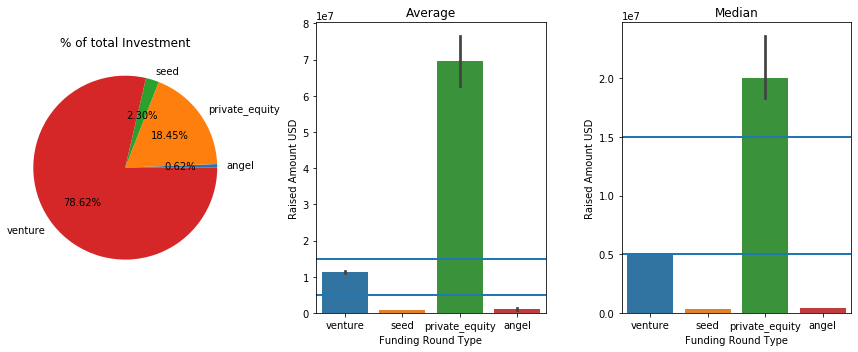

In [1270]:
# plotting the chart
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.pie(funding_type_plot_pie['sum'], labels = funding_type_plot_pie.funding_round_type, autopct='%1.2f%%')
plt.title("% of total Investment")
plt.tight_layout()

plt.subplot(1, 3, 2)
plt2 = sns.barplot(y='raised_amount_usd', x="funding_round_type", data=funding_type_plot, estimator=np.mean)
plt2.set(xlabel= 'Funding Round Type', ylabel= 'Raised Amount USD')
plt.title("Average")
plt.axhline(y=5000000, linewidth=2)
plt.axhline(y=15000000, linewidth=2)
plt.tight_layout()

plt.subplot(1, 3, 3)
plt3 = sns.barplot(y='raised_amount_usd', x="funding_round_type", data=funding_type_plot, estimator=np.median)
plt3.set(xlabel= 'Funding Round Type', ylabel= 'Raised Amount USD')
plt.title("Median")
plt.axhline(y=5000000, linewidth=2)
plt.axhline(y=15000000, linewidth=2)

plt.show()

Looking at the mean and median value, both of them suggest that venture funding round should be choosen. 

Only Venture founding round has value in the range as required by Sparks Fund

##### Question 2
A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

In [1271]:
# resetting the index for top9 before plotting the chart
top9 = top9.reset_index()

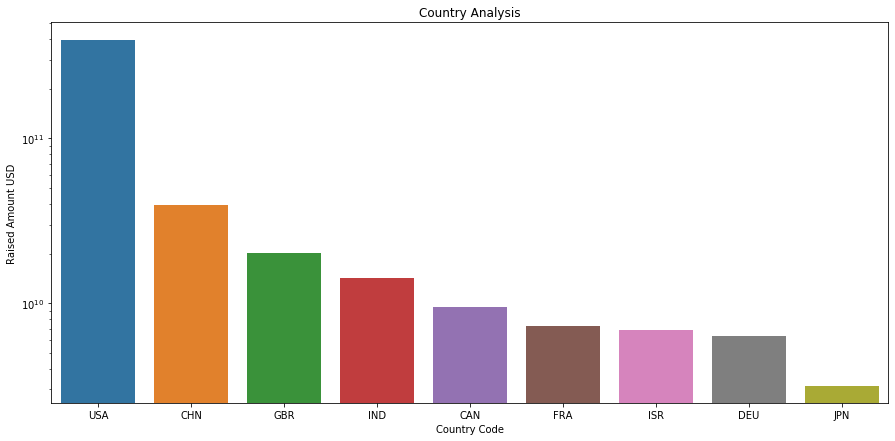

In [1272]:
# plotting the chart
plt.figure(figsize=(15, 7))
top9_plot = sns.barplot(x="country_code", y="raised_amount_usd", data=top9, estimator=sum )
top9_plot.set_yscale('log')
top9_plot.set(xlabel= 'Country Code', ylabel= 'Raised Amount USD')
plt.title("Country Analysis")
plt.show()

English speaking country selected: USA, GBR and IND

##### Question 3
A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). 

In [1273]:
# Aggreagating data for Country 1 - USA
D1_plot = D1.groupby(['main_sector','country_code'])['raised_amount_usd'].agg(['count']).sort_values(by='count', ascending=False).head(3)

In [1274]:
# Aggreagating data for Country 2 - GBR
D2_plot = D2.groupby(['main_sector','country_code'])['raised_amount_usd'].agg(['count']).sort_values(by='count', ascending=False).head(3)

In [1275]:
# Aggreagating data for Country 3 - IND
D3_plot = D3.groupby(['main_sector','country_code'])['raised_amount_usd'].agg(['count']).sort_values(by='count', ascending=False).head(3)

In [1276]:
# Appending data for all three country into a single dataframe to make plot
Plot = D1_plot.append(D2_plot).append(D3_plot).reset_index()

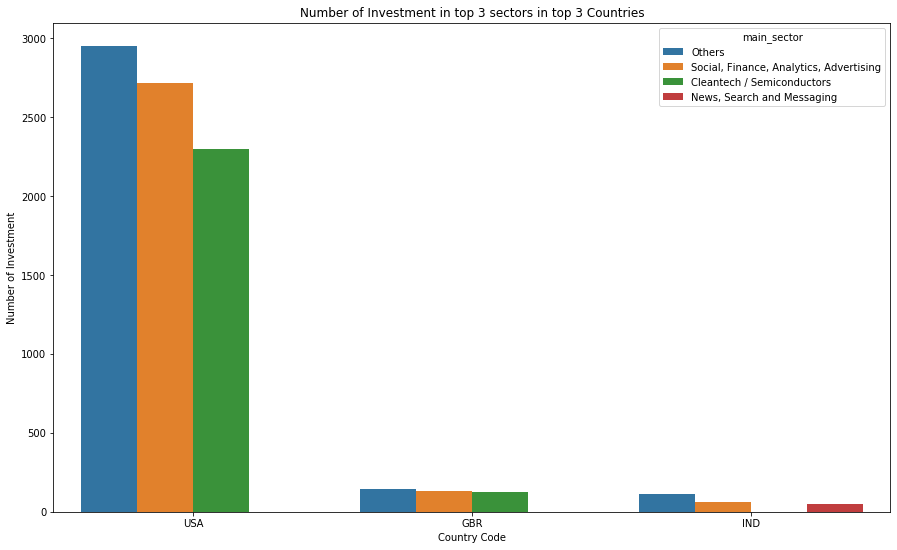

In [1277]:
# Plotting the data
plt.figure(figsize=(15, 9))
sec_coun = sns.barplot(x='country_code', y='count', hue="main_sector", data=Plot)
sec_coun.set(xlabel= 'Country Code', ylabel= 'Number of Investment')
plt.title("Number of Investment in top 3 sectors in top 3 Countries")
plt.show()